<a href="https://colab.research.google.com/github/idrisello/free_projects/blob/main/toshkent_uylar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [6]:
df.describe()

,rooms,level,max_levels
count,7565.000000,7565.000000,7565.000000
mean,2.625644,3.699273,6.038202
std,1.085201,2.237275,2.613271
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,5.000000
75%,3.000000,5.000000,9.000000
max,10.000000,19.000000,25.000000


In [7]:
df.isnull().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

In [14]:
df['size'].unique()

array(['57', '52', '42', '65', '70', '28', '30', '32', '51', '67', '35',
       '43', '90', '80', '69', '96', '76', '45', '27', '64', '26', '72',
       '100', '63', '48', '102', '78', '34', '56', '98', '93', '60', '82',
       '120', '110', '95', '68', '46', '40', '53', '54', '20', '50', '36',
       '58', '74', '94', '85', '125', '64.67', '22', '66', '37', '61',
       '69.65', '88', '38', '55.13', '91', '111', '107', '62', '40.41',
       '75', '84', '117', '47', '33', '187', '29', '11', '122', '119',
       '164', '92', '55', '89', '208', '44', '86', '150', '56.10', '83',
       '49', '142', '115', '350', '81', '89.55', '59', '145', '116', '77',
       '24', '41', '255', '266', '210', '55.62', '140', '141', '60.94',
       '165', '215', '66.82', '128', '97', '130', '105', '137', '47.14',
       '71', '160', '118', '152', '21', '104', '180', '109', '135', '73',
       '39', '39.11', '157', '112', '93.22', '106', '214', '235', '16',
       '300', '57.95', '79', '5', '53.06', '62.50',

In [107]:
df['price'].replace('Договорная', np.nan, inplace=True)
df['size'].replace('Площадьземли:1сот', 100, inplace=True)
df.price.isna().sum()

0

In [53]:
# Convert 'price' column to numeric, handling errors
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['size']= pd.to_numeric(df['size'], errors='coerce')
print(df['size'].dtype)

float64


In [50]:
df['size'].unique()

array(['57', '52', '42', '65', '70', '28', '30', '32', '51', '67', '35',
       '43', '90', '80', '69', '96', '76', '45', '27', '64', '26', '72',
       '100', '63', '48', '102', '78', '34', '56', '98', '93', '60', '82',
       '120', '110', '95', '68', '46', '40', '53', '54', '20', '50', '36',
       '58', '74', '94', '85', '125', '64.67', '22', '66', '37', '61',
       '69.65', '88', '38', '55.13', '91', '111', '107', '62', '40.41',
       '75', '84', '117', '47', '33', '187', '29', '11', '122', '119',
       '164', '92', '55', '89', '208', '44', '86', '150', '56.10', '83',
       '49', '142', '115', '350', '81', '89.55', '59', '145', '116', '77',
       '24', '41', '255', '266', '210', '55.62', '140', '141', '60.94',
       '165', '215', '66.82', '128', '97', '130', '105', '137', '47.14',
       '71', '160', '118', '152', '21', '104', '180', '109', '135', '73',
       '39', '39.11', '157', '112', '93.22', '106', '214', '235', '16',
       '300', '57.95', '79', '5', '53.06', '62.50',

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7565 non-null   float64
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7466 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 413.8+ KB


In [63]:
df.corrwith(df['price'], numeric_only=True)*100

rooms             5.617597
size              0.110618
level            -0.345379
max_levels        1.116829
price           100.000000
perroom          -0.055626
averagelevel      0.885178
dtype: float64

In [99]:
df.corr(numeric_only=True)*100

,rooms,size,level,max_levels,price,perroom,averagelevel
rooms,100.000000,80.467786,14.178818,17.722775,59.127781,-35.006282,1.127022
size,80.467786,100.000000,18.572614,30.568135,79.604603,20.756917,6.311837
level,14.178818,18.572614,100.000000,59.534010,7.465859,9.311214,-56.377008
max_levels,17.722775,30.568135,59.534010,100.000000,25.609984,22.054737,16.307113
price,59.127781,79.604603,7.465859,25.609984,100.000000,22.818900,11.807534
perroom,-35.006282,20.756917,9.311214,22.054737,22.818900,100.000000,7.144720
averagelevel,1.127022,6.311837,-56.377008,16.307113,11.807534,7.144720,100.000000


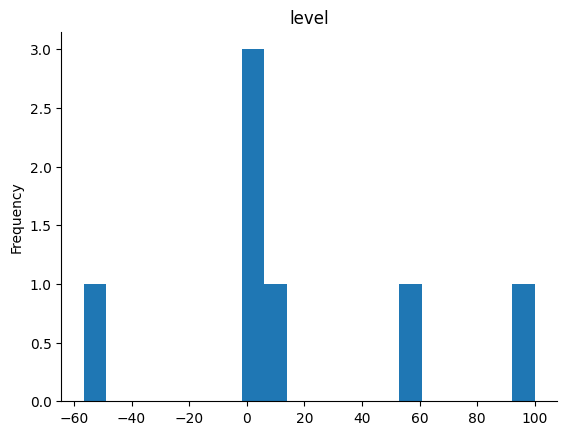

In [67]:
from matplotlib import pyplot as plt
_df_2['level'].plot(kind='hist', bins=20, title='level')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [59]:
df['perroom']=df['size']/df['rooms']
df['averagelevel']=df['max_levels']/df['level']


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7318 entries, 0 to 7564
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      7318 non-null   object 
 1   district      7318 non-null   object 
 2   rooms         7318 non-null   int64  
 3   size          7318 non-null   float64
 4   level         7318 non-null   int64  
 5   max_levels    7318 non-null   int64  
 6   price         7318 non-null   float64
 7   perroom       7318 non-null   float64
 8   averagelevel  7318 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 571.7+ KB


In [103]:
df

,location,district,rooms,size,level,max_levels,price,perroom,averagelevel
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000.0,19.000000,1.000000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000.0,26.000000,1.250000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000.0,21.000000,1.000000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500.0,21.666667,4.000000
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000.0,23.333333,1.666667
...,...,...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.0,5,5,24500.0,38.000000,1.000000
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49.0,1,4,32000.0,24.500000,4.000000
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64.0,3,9,40000.0,32.000000,3.000000
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18.0,1,4,11000.0,18.000000,4.000000


In [104]:
cols=["rooms",'size', 'level', 'max_levels','perroom','averagelevel']
cols

['rooms', 'size', 'level', 'max_levels', 'perroom', 'averagelevel']

<Axes: xlabel='price', ylabel='size'>

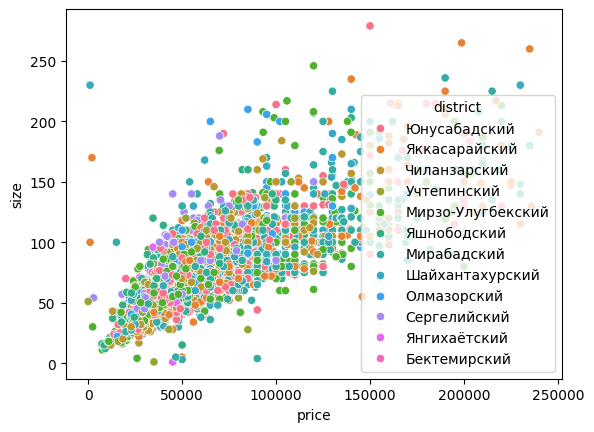

In [94]:
sns.scatterplot(data=df,x='price',y='size',hue='district')

In [82]:
df.size.max()

66114

In [83]:
df.size.mean()

66114.0

In [97]:
mask=df.price<250_000
df=df[mask]
mask=df.rooms<7
df=df[mask]
mask=df['size']<280
df=df[mask]
df

,location,district,rooms,size,level,max_levels,price,perroom,averagelevel
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000.0,19.000000,1.000000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000.0,26.000000,1.250000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000.0,21.000000,1.000000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500.0,21.666667,4.000000
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000.0,23.333333,1.666667
...,...,...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.0,5,5,24500.0,38.000000,1.000000
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49.0,1,4,32000.0,24.500000,4.000000
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64.0,3,9,40000.0,32.000000,3.000000
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18.0,1,4,11000.0,18.000000,4.000000


In [92]:
df[df['size']>250].value_counts()

location                                                        district           rooms  size   level  max_levels  price     perroom     averagelevel
город Ташкент, Шайхантахурский район, Хувайдо                   Шайхантахурский    7      320.0  7      7           130000.0  45.714286   1.0             2
город Ташкент, Мирабадский район, Мингурик                      Мирабадский        2      280.0  9      9           48000.0   140.000000  1.0             1
город Ташкент, Мирабадский район, Сайхун                        Мирабадский        3      313.0  5      5           65000.0   104.333333  1.0             1
город Ташкент, Мирзо-Улугбекский район, Ирригатор               Мирзо-Улугбекский  6      347.0  3      9           240000.0  57.833333   3.0             1
город Ташкент, Мирзо-Улугбекский район, Хирмонтепа (Никитина)   Мирзо-Улугбекский  6      400.0  1      2           2000.0    66.666667   2.0             1
город Ташкент, Сергелийский район, 7                            Серге

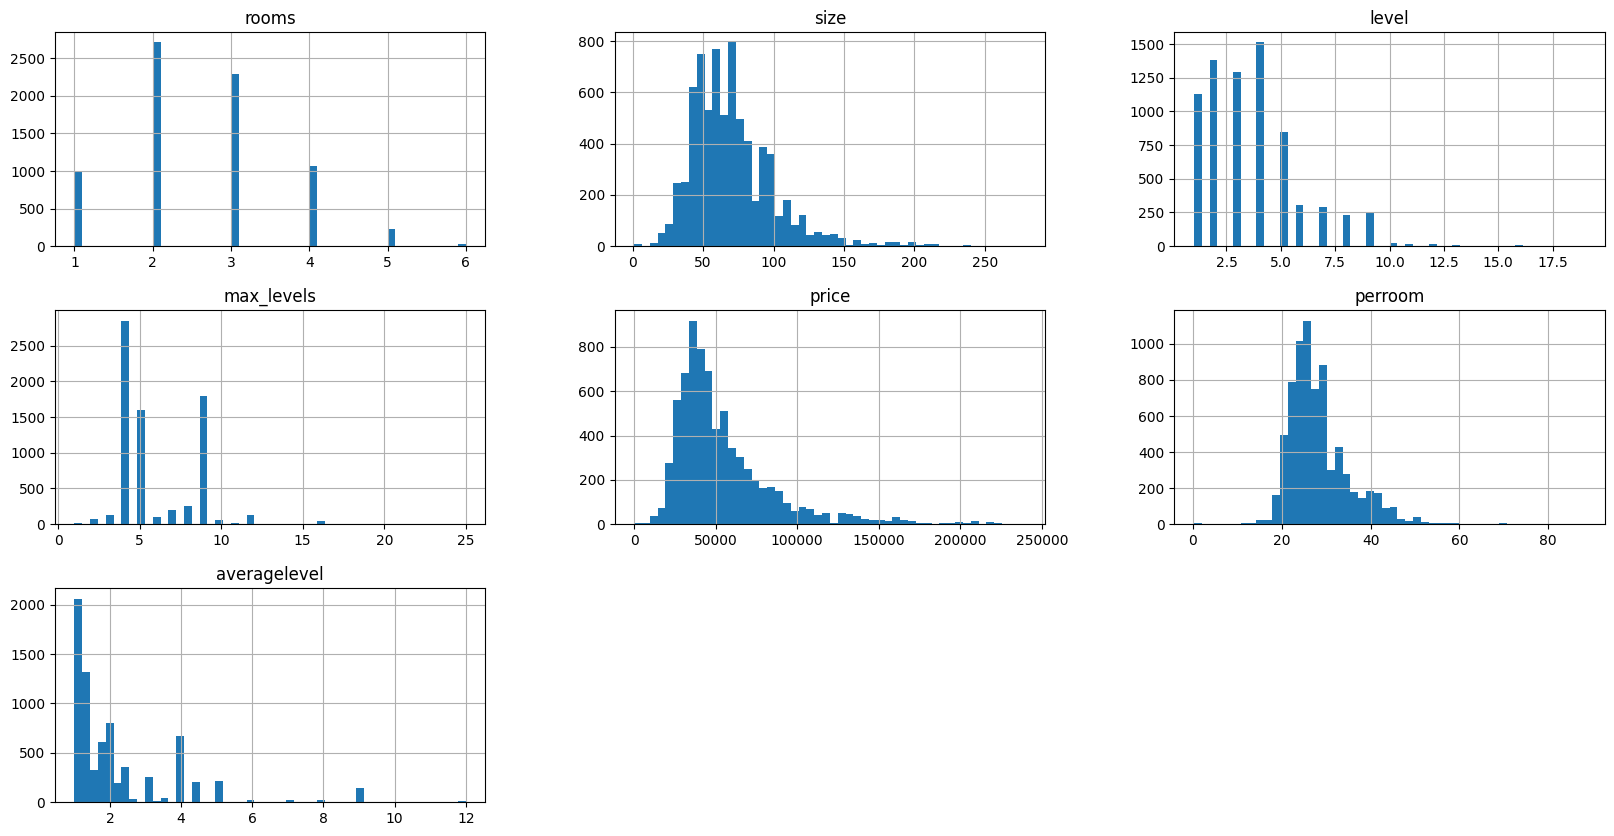

In [98]:
df.hist(bins=50,figsize=(20,10))
plt.show()

In [117]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=23)

housing = train_set.drop(["price", 'location'],axis=1)
housing_labels = train_set["price"].copy()

housing_num = housing[cols]
housing_num.head()

,rooms,size,level,max_levels,perroom,averagelevel
2149,3,90.0,5,5,30.0,1.0
6656,4,120.0,10,16,30.0,1.6
1604,2,48.0,5,5,24.0,1.0
421,2,50.0,4,4,25.0,1.0
1792,2,48.0,1,4,24.0,4.0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7318 entries, 0 to 7564
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      7318 non-null   object 
 1   district      7318 non-null   object 
 2   rooms         7318 non-null   int64  
 3   size          7318 non-null   float64
 4   level         7318 non-null   int64  
 5   max_levels    7318 non-null   int64  
 6   price         7318 non-null   float64
 7   perroom       7318 non-null   float64
 8   averagelevel  7318 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 571.7+ KB


In [118]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
#3ta classi 1ta pipelanga qoyvorsh
num_pipeline = Pipeline([
           ('std_scaler', StandardScaler())
])

In [119]:
num_pipeline.fit_transform(housing_num)

array([[ 0.41165761,  0.645494  ,  0.5727911 , -0.37974258,  0.22506724,
        -0.73055365],
       [ 1.38928179,  1.64498127,  2.79428249,  3.87223857,  0.22506724,
        -0.35002744],
       [-0.56596658, -0.75378818,  0.5727911 , -0.37974258, -0.60252761,
        -0.73055365],
       ...,
       [ 0.41165761,  0.21238285, -1.20440201, -0.76628632, -0.37264015,
         1.17207739],
       [ 1.38928179,  1.31181885, -1.20440201,  1.16643238, -0.11976395,
         4.34312913],
       [ 0.41165761,  0.645494  , -1.20440201,  1.16643238,  0.22506724,
         4.34312913]])

In [120]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OrdinalEncoder(), cat_attribs)
])

In [121]:
X_prepared = full_pipeline.fit_transform(housing)

In [122]:
X_prepared[0:8]

array([[ 0.41165761,  0.645494  ,  0.5727911 , -0.37974258,  0.22506724,
        -0.73055365,  9.        ],
       [ 1.38928179,  1.64498127,  2.79428249,  3.87223857,  0.22506724,
        -0.35002744,  1.        ],
       [-0.56596658, -0.75378818,  0.5727911 , -0.37974258, -0.60252761,
        -0.73055365,  5.        ],
       [-0.56596658, -0.68715569,  0.12849282, -0.76628632, -0.46459514,
        -0.73055365,  6.        ],
       [-0.56596658, -0.75378818, -1.20440201, -0.76628632, -0.60252761,
         1.17207739,  5.        ],
       [-0.56596658, -0.15409582, -0.76010373, -0.76628632,  0.63886467,
        -0.0963433 ,  1.        ],
       [ 1.38928179,  0.77875897,  2.34998421,  1.16643238, -0.67149385,
        -0.73055365,  6.        ],
       [-1.54359077, -1.15358308,  0.12849282, -0.76628632,  1.05266209,
        -0.73055365,  6.        ]])

# Machini Learning

In [123]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

In [124]:
LR_model.fit(X_prepared, housing_labels)

LinearRegression()

# Test

In [125]:
test_data=housing.sample(10)
test_data

,district,rooms,size,level,max_levels,perroom,averagelevel
1235,Чиланзарский,2,52.0,1,4,26.000000,4.00
4461,Яккасарайский,1,33.0,4,5,33.000000,1.25
2031,Чиланзарский,3,97.0,1,8,32.333333,8.00
1388,Учтепинский,2,42.0,4,5,21.000000,1.25
6333,Чиланзарский,3,58.0,2,4,19.333333,2.00
7187,Учтепинский,3,82.0,5,9,27.333333,1.80
5722,Яккасарайский,1,26.0,1,4,26.000000,4.00
1025,Шайхантахурский,3,65.0,1,4,21.666667,4.00
6357,Чиланзарский,3,100.0,4,12,33.333333,3.00
1728,Мирзо-Улугбекский,4,140.0,5,9,35.000000,1.80


In [126]:
# yuqoridagi qatorlarga mos keluvchi narxlarni ajratib olamiz (biz aynan shu qiymatlarni bashorat qilishimiz kerak)
test_label = housing_labels.loc[test_data.index]
test_label

1235    39500.0
4461    32000.0
2031    72944.0
1388    31500.0
6333    40500.0
7187    40000.0
5722    30000.0
1025    45000.0
6357    54000.0
1728    84000.0
Name: price, dtype: float64

In [127]:
test_data_prepared = full_pipeline.transform(test_data)

In [128]:
predicted_data = LR_model.predict(test_data_prepared) #predict qlsh
predicted_data

array([ 41330.62231915,  21860.1941042 ,  82412.13213126,  29333.65234897,
        42202.19771055,  66122.96401384,  19187.31333624,  48998.42965865,
        88671.65388865, 119875.46935688])

In [130]:
x_test = test_set.drop(["price", 'location'],axis=1)
y_test = test_set["price"].copy()

In [131]:
x_test

,district,rooms,size,level,max_levels,perroom,averagelevel
2103,Юнусабадский,4,110.0,3,9,27.500000,3.000000
2298,Юнусабадский,1,43.0,1,4,43.000000,4.000000
5302,Чиланзарский,3,68.0,4,4,22.666667,1.000000
5802,Мирабадский,4,120.0,1,5,30.000000,5.000000
88,Учтепинский,4,78.0,5,5,19.500000,1.000000
...,...,...,...,...,...,...,...
870,Чиланзарский,2,47.0,4,5,23.500000,1.250000
1823,Мирабадский,3,70.0,3,4,23.333333,1.333333
4706,Юнусабадский,2,62.0,7,9,31.000000,1.285714
4105,Мирзо-Улугбекский,2,55.0,4,4,27.500000,1.000000


In [132]:
X_test_prepared = full_pipeline.transform(x_test)

In [133]:
y_predicted = LR_model.predict(X_test_prepared)

In [134]:
y_predicted

array([91133.04422868, 33760.10809688, 48035.45682378, ...,
       45128.36878933, 41679.56223431, 85967.27180714])

In [135]:
from sklearn.metrics import mean_squared_error #ortacha kvadrat xatolik
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

18917.828416084543


In [136]:
from sklearn.metrics import mean_absolute_error #ortacha absalyut xatolik
lin_mae = mean_absolute_error(y_test, y_predicted)
print(lin_mae)

12629.202794990195


# Decision Tree

In [137]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared, housing_labels)

DecisionTreeRegressor()

In [139]:
y_predicted = Tree_model.predict(X_test_prepared)

In [140]:
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

18551.043676517624


In [141]:
lin_mae= mean_absolute_error(y_test, y_predicted)
print(lin_mae)

10436.794655897382


# **RandomForest**

In [142]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, housing_labels)

RandomForestRegressor()

In [143]:
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

14977.058309857313


In [144]:
lin_mae= mean_absolute_error(y_test, y_predicted)
print(lin_mae)

9104.203843827525


# **Modelni saqlash**

In [145]:
#1-usul
import joblib

filename = 'RF_model.jbl' # faylga istalgan nom beramiz
joblib.dump(RF_model, filename)

['RF_model.jbl']

In [146]:
#oqish
model = joblib.load(filename)

In [147]:
filename = 'pipeline.jbl'
joblib.dump(full_pipeline, filename)

['pipeline.jbl']

In [150]:
#2-usul
import pickle

filename = 'TR_model.pkl' # faylga istalgan nom beramiz
with open(filename, 'wb') as file:
    pickle.dump(Tree_model, file)

In [151]:
filename='LR_model.jbl'
joblib.dump(LR_model,filename)

['LR_model.jbl']